###### Exercise 3

https://drive.google.com/open?id=1hsIWEsHS5XAnjaPLwf0rJlUBP1S2qycz

Number of nodes: 11

Number of edges: 12

Graph is not connected, 7 is left out

###### Exercise 4

N * (n-1) /2 = 55

###### Exercise 5

Diameter: 4

Radius: 0

###### Exercise 6

T(8-10) = T(8-9) + T(9-10) = (Tb + Tt + Tp) + (Tb + Tt + Tp) = (2 + 1 + 5) + (2 + 1 + 5) = 16

T(4-6) = T(4-0) + T(0-6) = 16

###### Exercise 7

In [21]:
%matplotlib inline
import igraph
g = igraph.Graph()

In [22]:
g.add_vertices(11)

In [23]:
g.add_edges([(0, 4), (0, 5), (0, 6), (0, 8), (1, 4), (2, 4), (3, 4), (4, 5), (5, 9), (9, 10), (5, 8), (8, 9)])

In [24]:
print(g)

IGRAPH U--- 11 12 --
+ edges:
0--4 0--5 0--6 0--8 1--4 2--4 3--4 4--5 5--9 9--10 5--8 8--9


Number of vertices: 11

Number of edges: 12

In [25]:
g.eccentricity()

[3.0, 4.0, 4.0, 4.0, 3.0, 2.0, 4.0, 0.0, 3.0, 3.0, 4.0]

In [26]:
g.radius()

0.0

In [27]:
g.diameter()

4

###### Exercise 8

In [28]:
g = igraph.Graph.Read_GraphML('exercise/networks/NREN.graphml')

In [29]:
g.summary()

'IGRAPH U-WT 1157 1465 -- \n+ attr: Date (g), GeoLocation (g), Network (g), Country (v), GeoLocation (v), Internal (v), Latitude (v), Longitude (v), Network (v), NetworkDate (v), asn (v), geocode_country (v), geocode_id (v), hyperedge (v), id (v), label (v), type (v), x (v), y (v), LinkLabel (e), LinkNote (e), LinkSpeedRaw (e), LinkSpeedUnits (e), LinkType (e), edge_color (e), edge_width (e), key (e), label (e), weight (e), zorder (e)'

Number of vertices: 1157

Number of edges: 1465

In [30]:
g.eccentricity()

[16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 16.0,
 16.0,
 16.0,
 16.0,
 17.0,
 16.0,
 16.0,
 16.0,
 15.0,
 15.0,
 16.0,
 18.0,
 20.0,
 20.0,
 21.0,
 21.0,
 22.0,
 23.0,
 21.0,
 23.0,
 24.0,
 25.0,
 24.0,
 26.0,
 21.0,
 26.0,
 26.0,
 27.0,
 25.0,
 22.0,
 19.0,
 21.0,
 20.0,
 19.0,
 19.0,
 18.0,
 17.0,
 16.0,
 17.0,
 17.0,
 18.0,
 18.0,
 18.0,
 17.0,
 16.0,
 16.0,
 18.0,
 17.0,
 15.0,
 16.0,
 17.0,
 17.0,
 16.0,
 17.0,
 16.0,
 17.0,
 18.0,
 16.0,
 17.0,
 16.0,
 16.0,
 17.0,
 17.0,
 18.0,
 17.0,
 18.0,
 18.0,
 17.0,
 16.0,
 17.0,
 17.0,
 17.0,
 17.0,
 19.0,
 20.0,
 21.0,
 20.0,
 19.0,
 18.0,
 18.0,
 19.0,
 20.0,
 21.0,
 21.0,
 20.0,
 19.0,
 18.0,
 19.0,
 17.0,
 18.0,
 18.0,
 19.0,
 20.0,
 19.0,
 19.0,
 19.0,
 19.0,
 19.0,
 18.0,
 19.0,
 20.0,
 19.0,
 18.0,
 17.0,
 16.0,
 17.0,
 17.0,
 18.0,
 18.0,
 18.0,
 18.0,
 19.0,
 17.0,
 17.0,
 18.0,
 18.0,
 19.0,
 18.0,
 19.0,
 19.0,
 20.0,
 19.0,
 19.0,
 18.0,
 19.0,
 19.0,
 17.0,
 18.0,
 20.0,
 15.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,
 16.0,

In [31]:
g.radius()

14.0

In [32]:
g.diameter()

27

###### Exercise 10

In [33]:
import numpy as np
import math

buffer_delay = np.random.normal(2, math.sqrt(0.2), len(g.es))
transmission_delay = np.random.normal(1, math.sqrt(0.15), len(g.es))
propagation_delay = np.random.normal(50, math.sqrt(20), len(g.es))
g.es["delay"] = buffer_delay + transmission_delay + propagation_delay

g.write_graphml("delay_included_NREN.graphml")

shortest_path = g.get_shortest_paths(0, 1102, "delay")[0]
e2e_delay = 0
for i in range(len(shortest_path)-1):
    edge = g.es[g.get_eid(shortest_path[i], shortest_path[i+1])]
    e2e_delay += edge["delay"]

print("Shortest path: " + str(shortest_path))
print("Number of hops: %d" % (len(shortest_path)-1))
print("End-to-end delay: %f" % e2e_delay)

Shortest path: [0, 16, 414, 408, 404, 670, 1081, 1104, 1103, 1102]
Number of hops: 9
End-to-end delay: 481.479268


###### Exercise 11

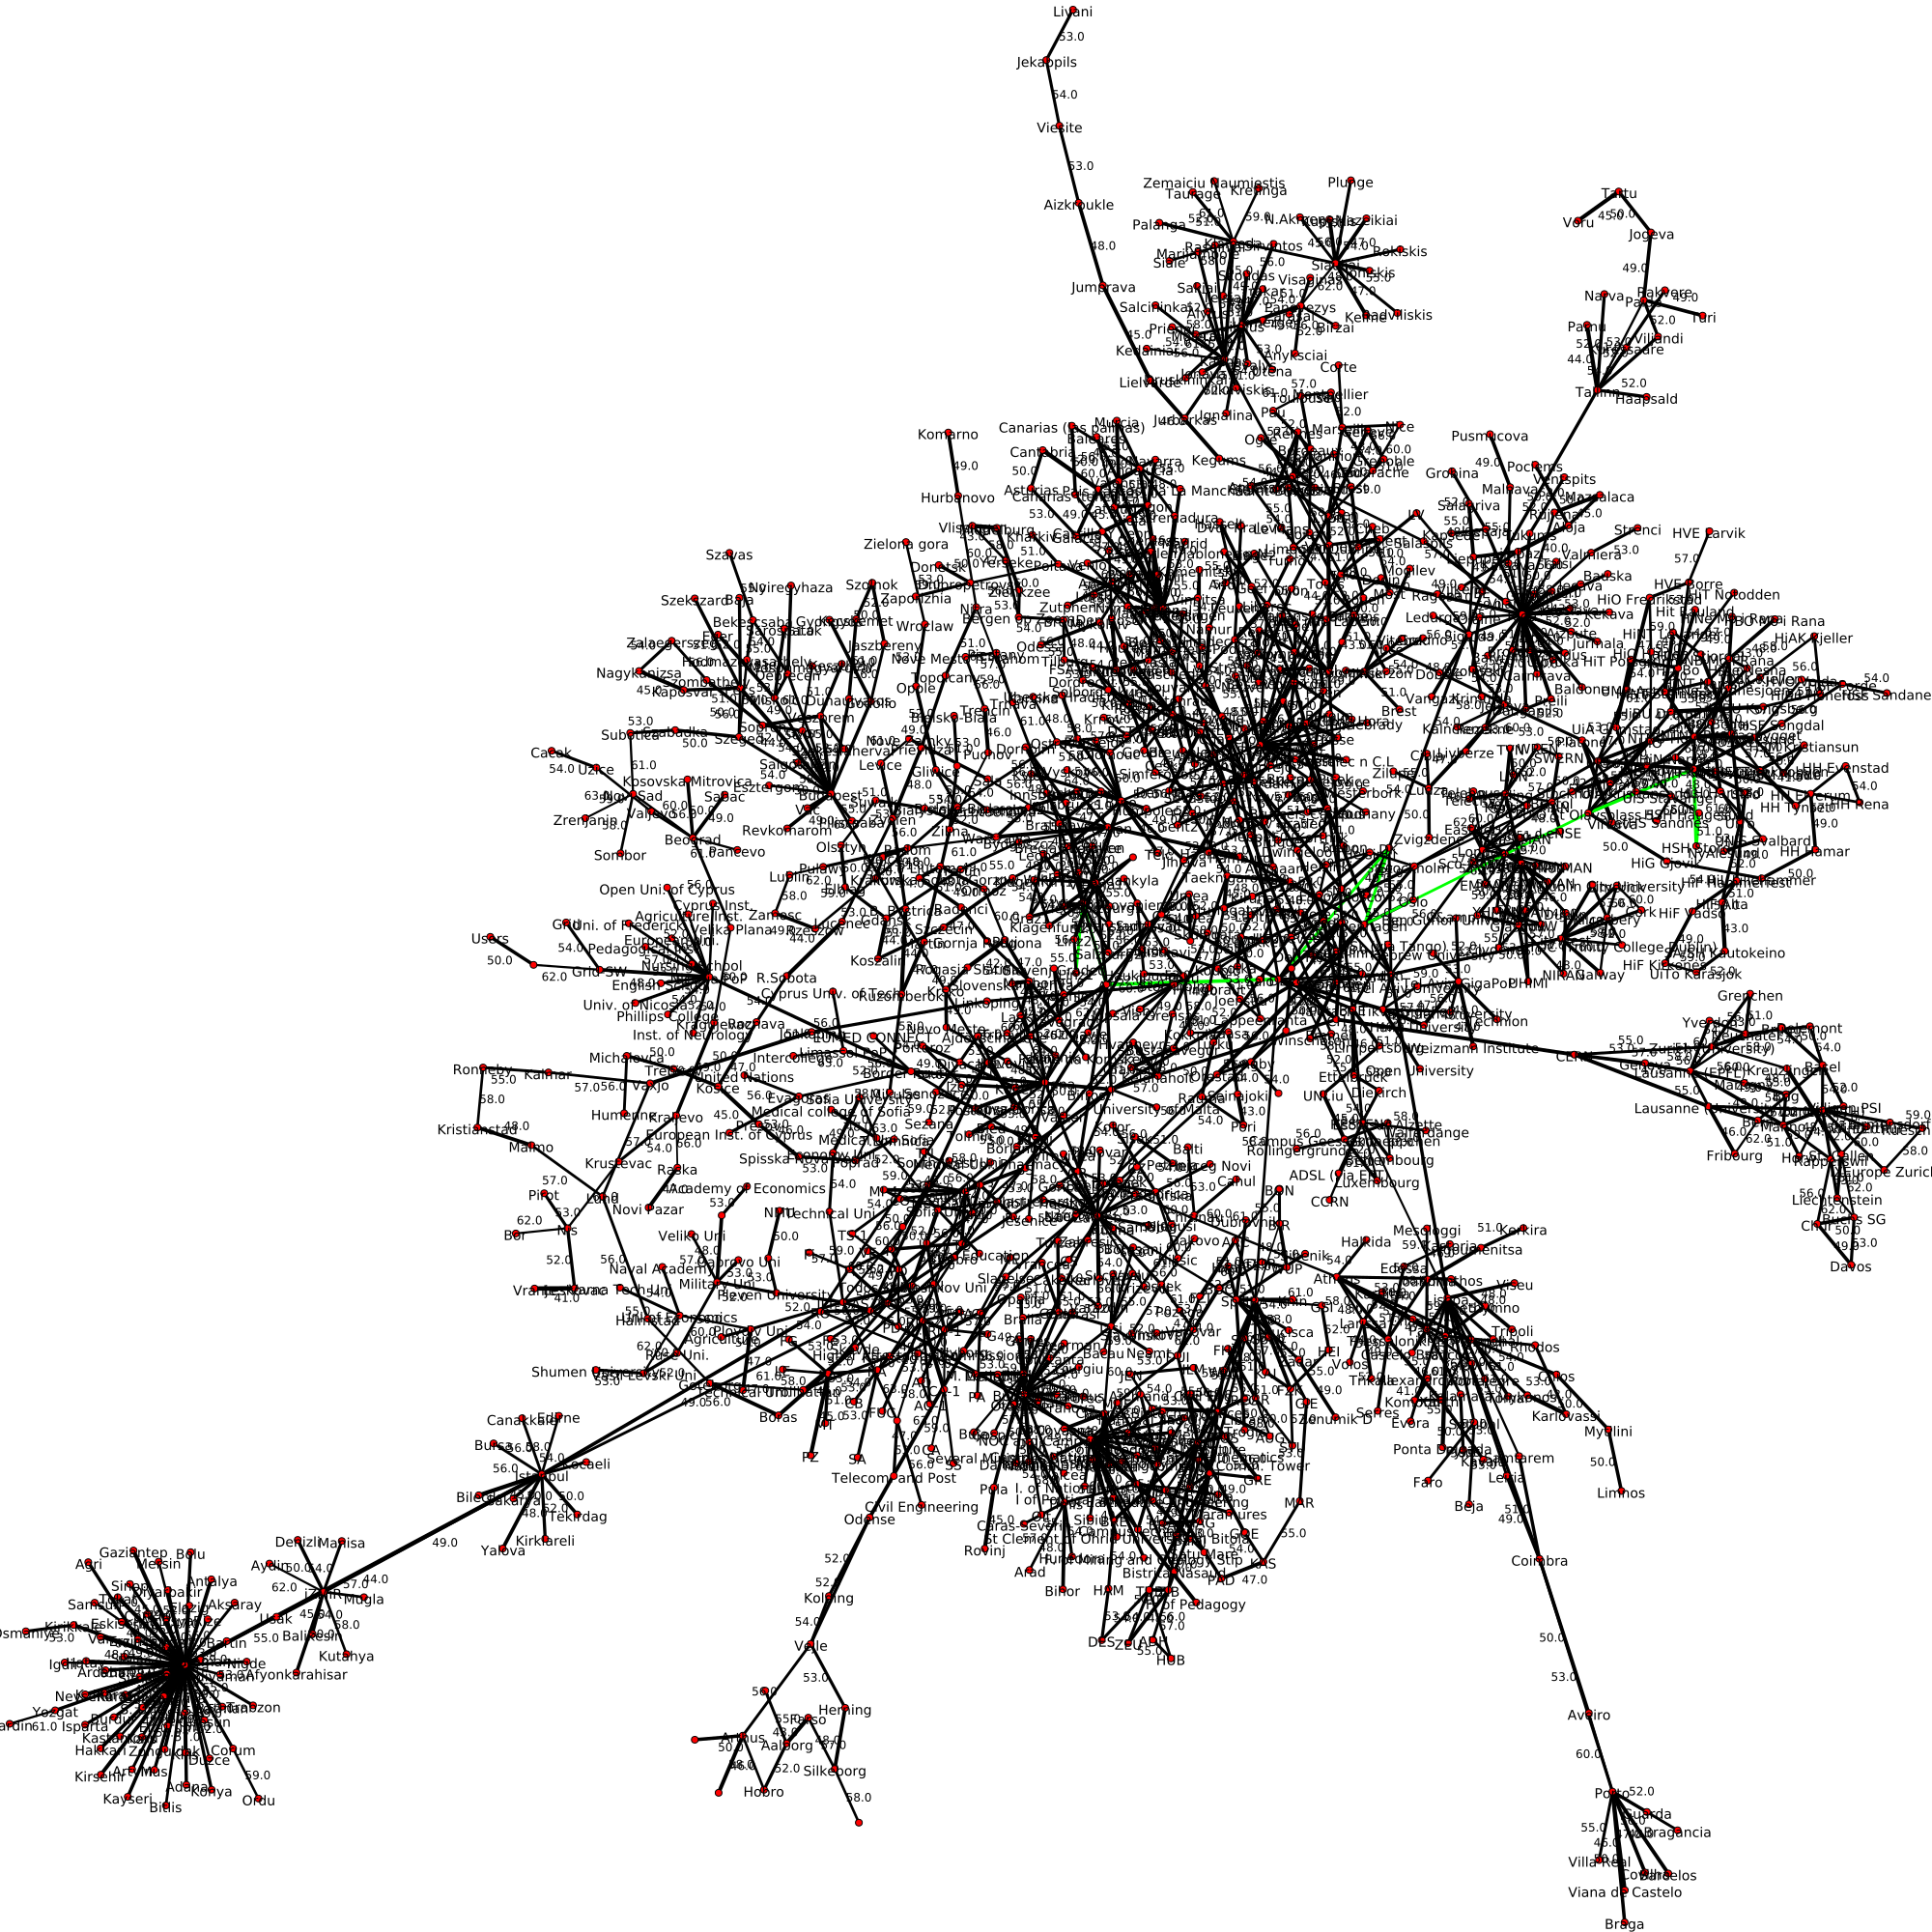

In [38]:
from igraph import plot
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1,5))

layout = g.layout("large")
g.es["delay"] = np.round(g.es["delay"])
g.es["edge_color"] = "black"

for i in range(len(shortest_path)-1):
    edge = g.es[g.get_eid(shortest_path[i], shortest_path[i+1])]
    edge["edge_color"] = "green"    # "highlight" the path in red
    
visual_style = {}
visual_style["vertex_shape"] = "circle"
visual_style["vertex_size"] = 7
visual_style["layout"] = layout
visual_style["bbox"] = (2000,2000)
visual_style["margin"] = 10
visual_style["label_dist"] = 20
visual_style["edge_label"] = g.es["delay"]
visual_style["edge_color"] = g.es["edge_color"]
edge_width = np.multiply(g.es["delay"], -1)
edge_width = scaler.fit_transform(np.asarray(edge_width).reshape(-1,1))
visual_style["edge_width"] = edge_width


plot(g, "nren.pdf", **visual_style)

###### Exercise 12

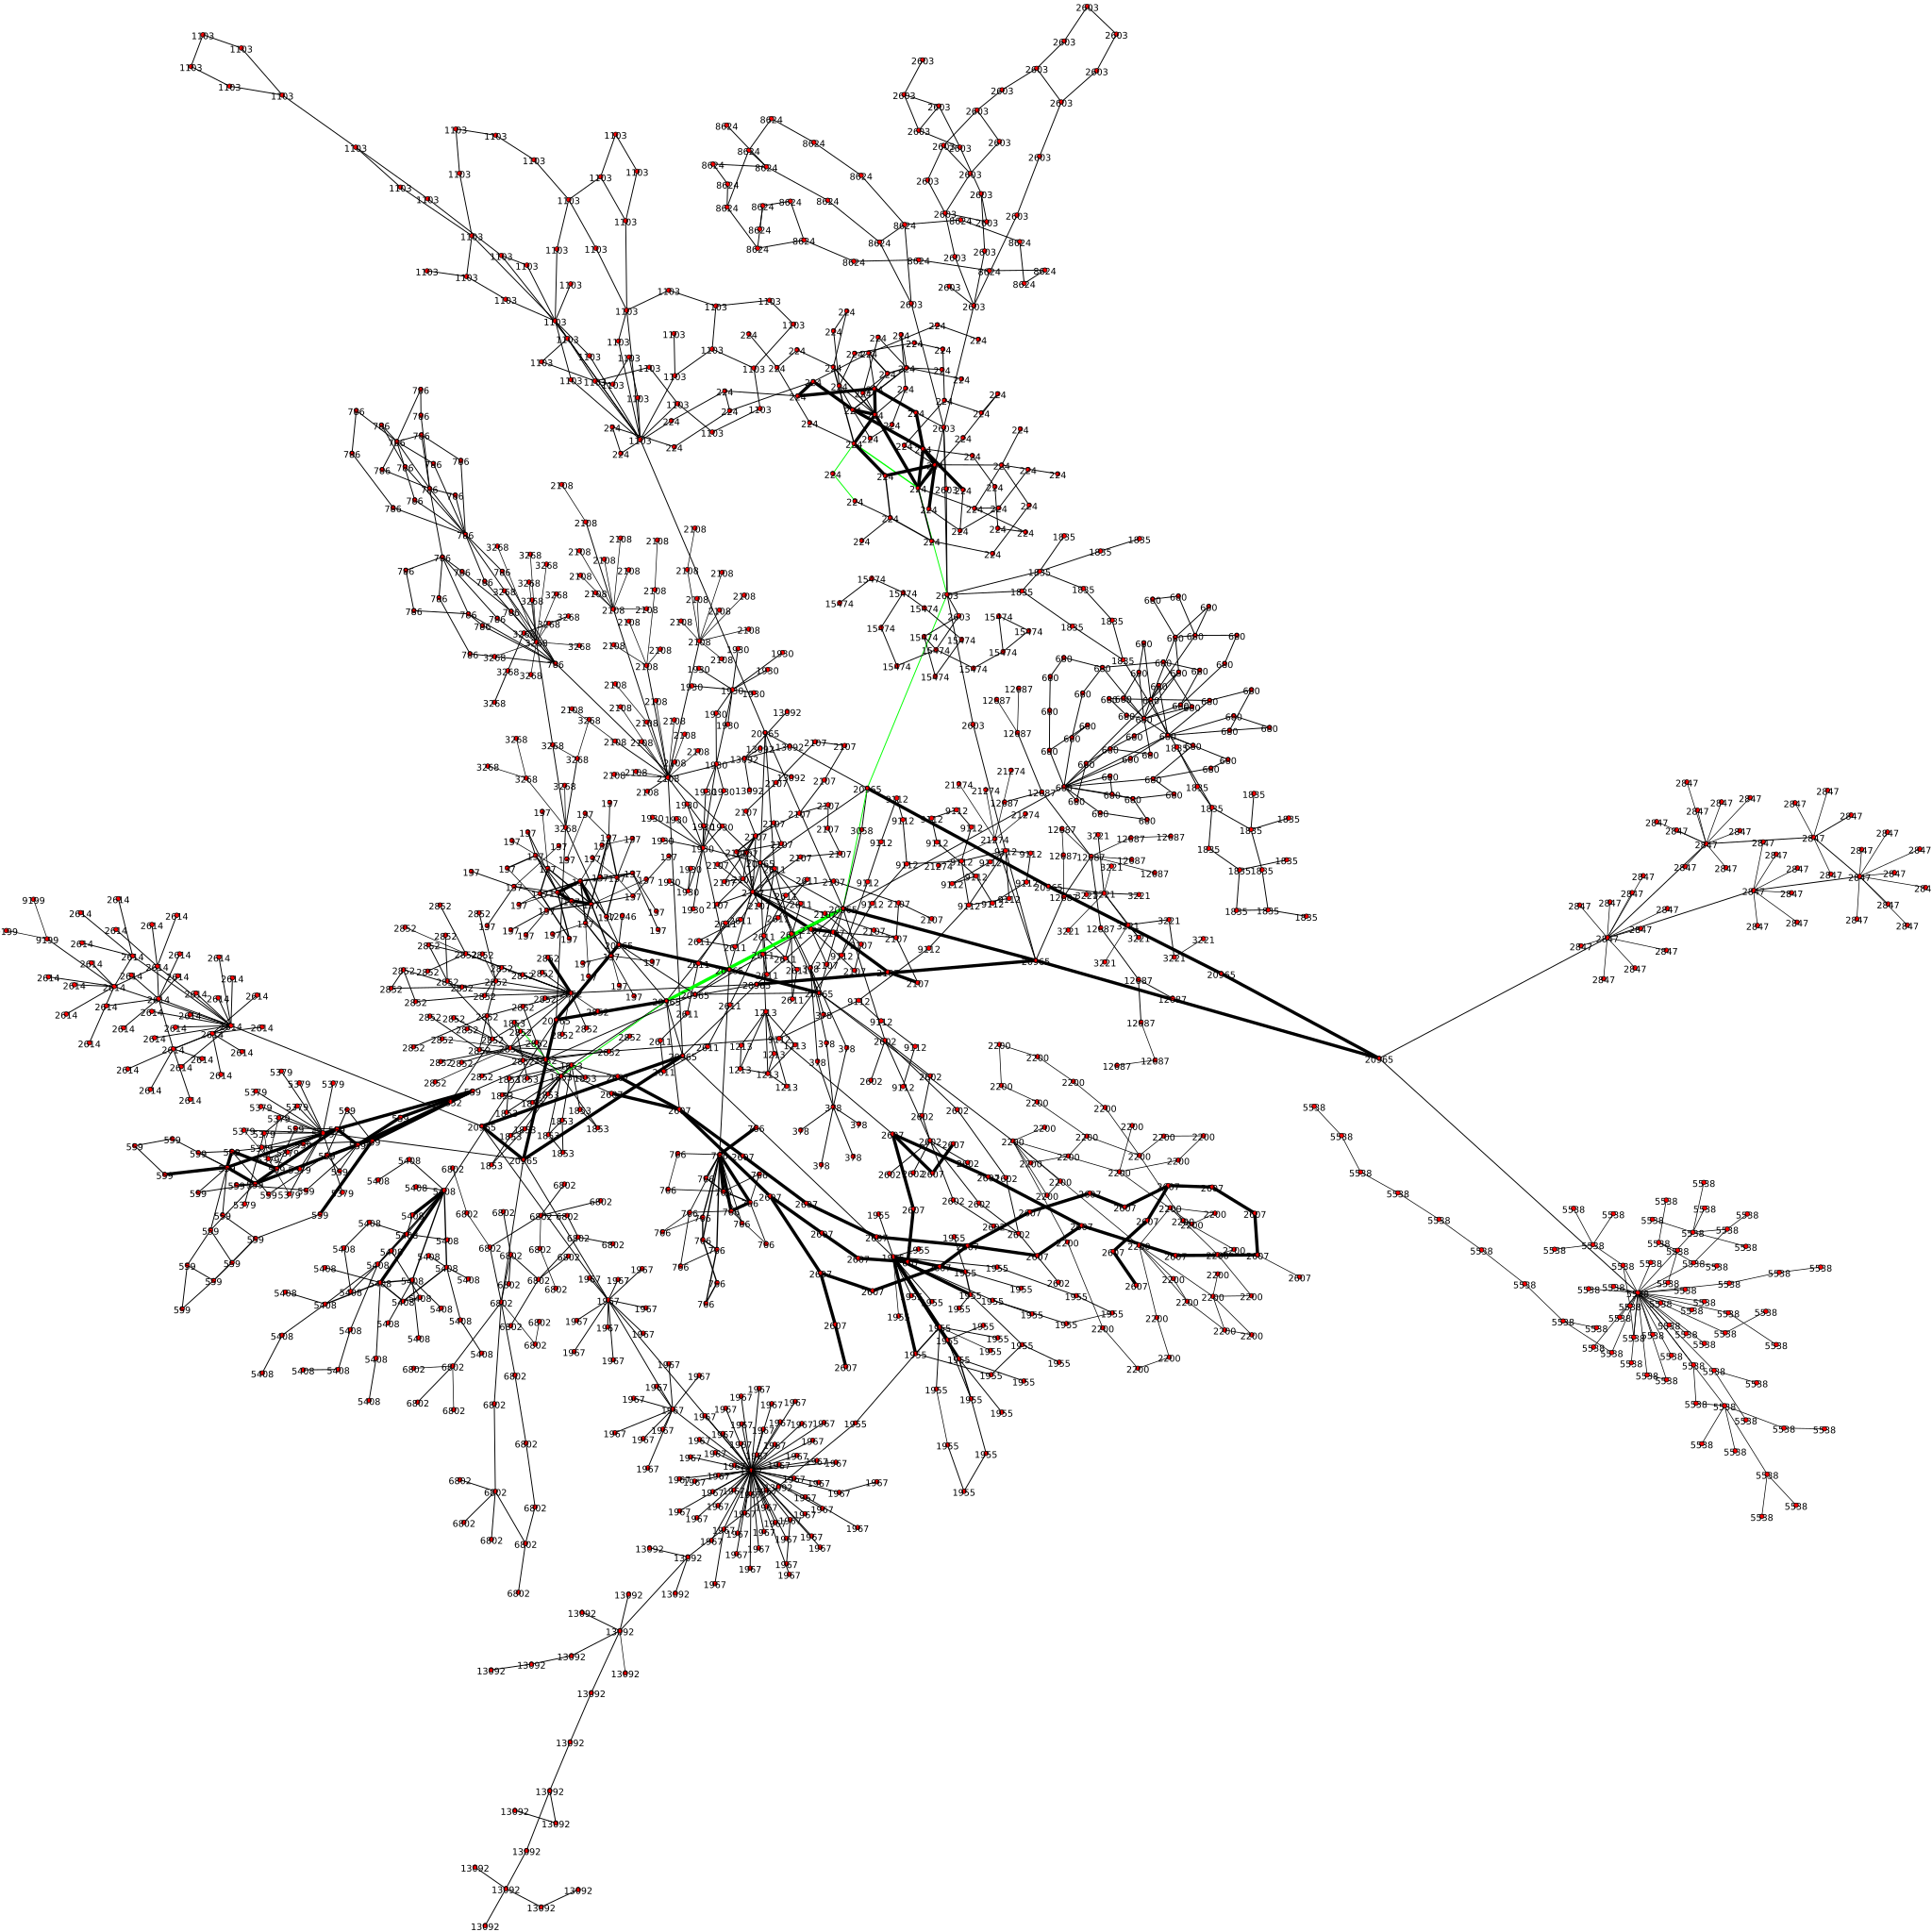

In [47]:
from igraph import plot

layout = g.layout("large")

visual_style = {}
visual_style["vertex_shape"] = "circle"
visual_style["vertex_size"] = 7
visual_style["vertex_label"] = g.vs["asn"]
visual_style["layout"] = layout
visual_style["bbox"] = (3000,3000)
visual_style["margin"] = 10
visual_style["label_dist"] = 20
visual_style["edge_label"] = None
visual_style["edge_color"] = g.es["edge_color"]
edge_width = g.es["LinkSpeedRaw"]
edge_width = scaler.fit_transform(np.asarray(edge_width).reshape(-1,1))
visual_style["edge_width"] = edge_width


plot(g, "nren.pdf", **visual_style)